In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hitters-baseball-data/Hitters.csv


**VERİ SETİ HİKAYESİ**

Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır.
Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir parçasıdır.
Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.
1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan
1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.


**DEĞİŞKENLER**

AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı

Hits: 1986-1987 sezonundaki isabet sayısı

HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı

Runs: 1986-1987 sezonunda takımına kazandırdığı sayı

RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı

Walks: Karşı oyuncuya yaptırılan hata sayısı

Years: Oyuncunun major liginde oynama süresi (sene)

CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı

CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı

CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı

CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı

CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı

CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı

League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör

Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör

PutOuts: Oyun icinde takım arkadaşınla yardımlaşma

Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı

Errors: 1986-1987 sezonundaki oyuncunun hata sayısı

Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)

NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

# KÜTÜPHANELER

In [2]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("/kaggle/input/hitters-baseball-data/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N


# GENEL RESİM

In [4]:
def check_df(dataframe, head=5):
    print("---------------------- Data Shape ----------------------")
    print(dataframe.shape)

    print("---------------------- İnformation ----------------------")
    print(dataframe.info())

    print("---------------------- Head ----------------------")
    print(dataframe.head(head))

    print("---------------------- Tail ----------------------")
    print(dataframe.tail(head))

    print("---------------------- Missing Values ----------------------")
    print(dataframe.isnull().sum())

    print("---------------------- Describe the Data ----------------------")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_df(df)

---------------------- Data Shape ----------------------
(322, 20)
---------------------- İnformation ----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Error

# Kategorik ve Numerik Değişken Analizi

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [6]:
cat_cols

['League', 'Division', 'NewLeague']

# Kategorik Değişken Analizi

        League  Ratio
League               
A          175 54.348
N          147 45.652
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


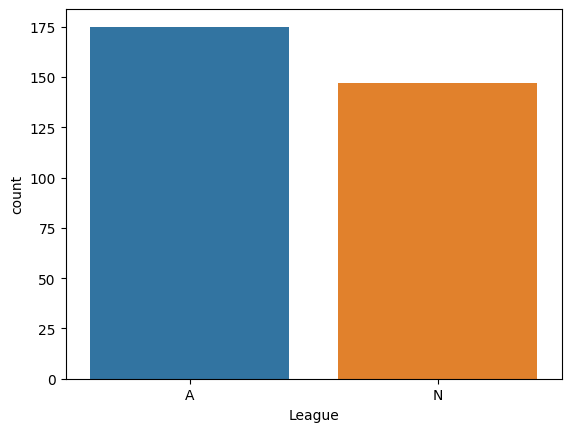

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


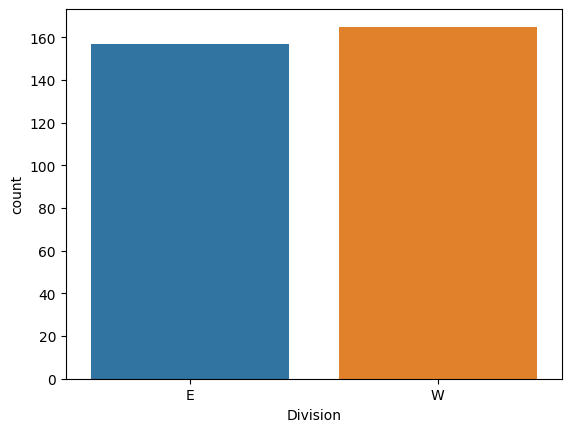

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


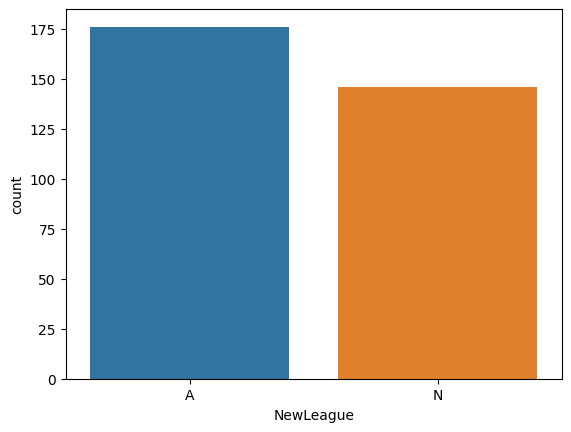

In [7]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

for col in cat_cols:
    cat_summary(df, col, plot=True)

# Numerik Değişken Analizi

,count,mean,std,min,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
AtBat,322.000,380.929,153.405,16.000,161.000,194.100,221.800,281.300,321.800,379.500,430.200,490.000,535.600,584.900,609.900,658.590,687.000
Hits,322.000,101.025,46.455,1.000,39.000,45.100,57.000,70.000,82.000,96.000,113.000,128.700,144.000,163.000,174.000,210.790,238.000
HmRun,322.000,10.770,8.709,0.000,0.000,1.000,3.000,5.000,6.000,8.000,10.600,14.000,18.000,24.000,28.950,33.000,40.000
Runs,322.000,50.910,26.024,0.000,17.000,20.100,27.000,33.000,41.000,48.000,55.600,66.000,75.800,89.000,94.000,107.790,130.000
RBI,322.000,48.028,26.167,0.000,14.000,19.000,26.000,30.000,36.400,44.000,49.000,58.000,73.000,86.000,96.000,112.370,121.000
Walks,322.000,38.742,21.639,0.000,11.050,15.000,20.000,24.000,30.000,35.000,40.000,48.700,59.000,69.900,78.000,93.580,105.000
Years,322.000,7.444,4.926,1.000,1.000,2.000,3.000,4.000,5.000,6.000,7.600,10.000,12.000,15.000,17.000,19.790,24.000
CAtBat,322.000,2648.683,2324.206,19.000,216.500,342.200,667.600,963.400,1402.200,1928.000,2654.000,3365.000,4483.000,6123.400,7125.600,8749.970,14053.000
CHits,322.000,717.571,654.473,4.000,54.000,86.000,164.600,238.000,355.800,508.000,708.200,911.100,1229.200,1659.600,2017.150,2500.340,4256.000
CHmRun,322.000,69.491,86.266,0.000,2.000,4.000,10.200,16.300,27.400,37.500,51.200,72.400,103.800,194.900,265.650,373.120,548.000


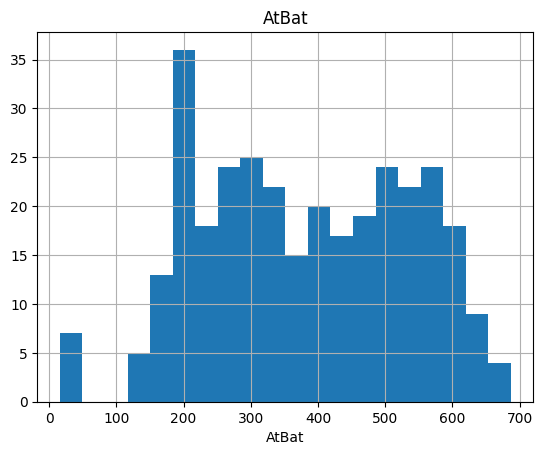

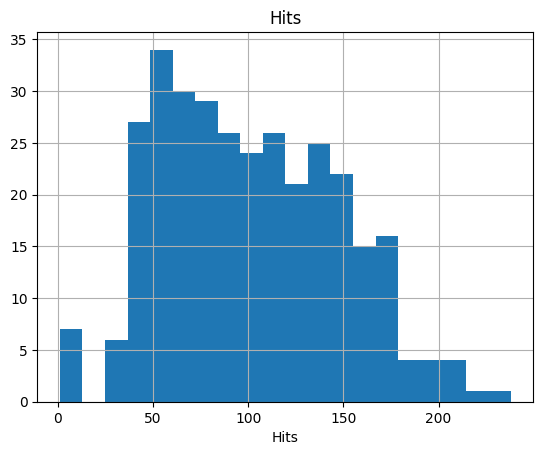

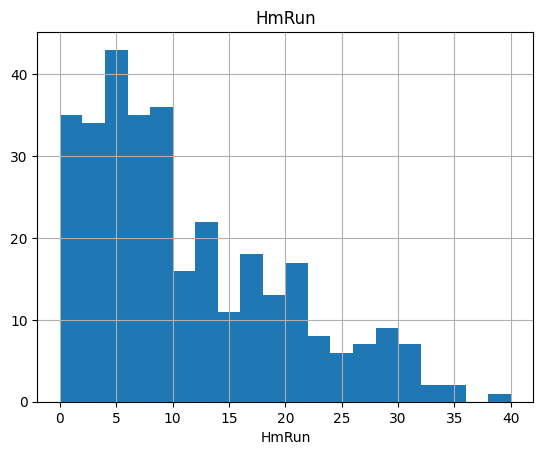

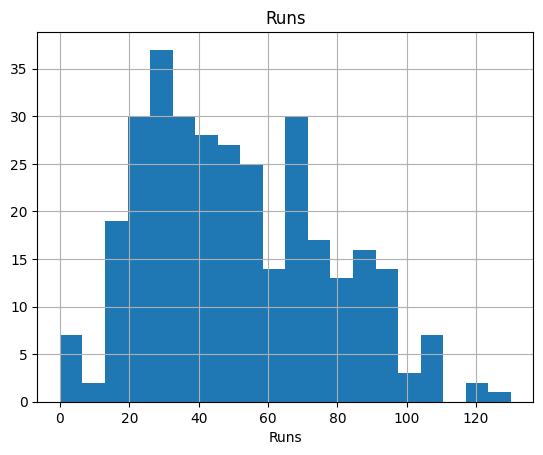

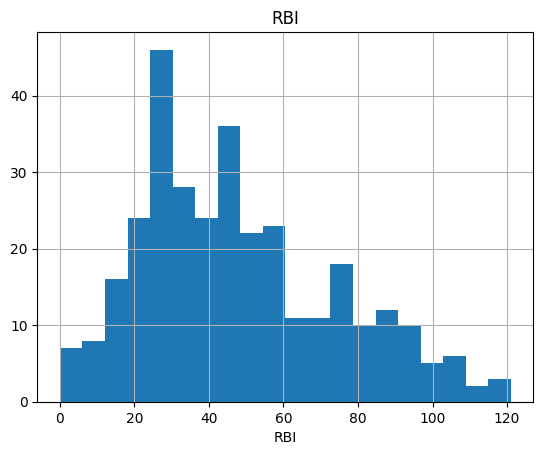

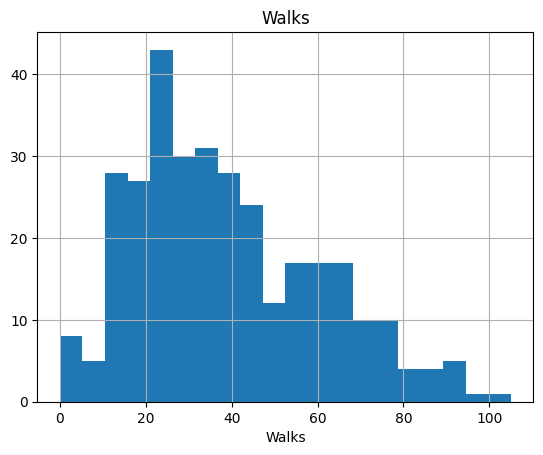

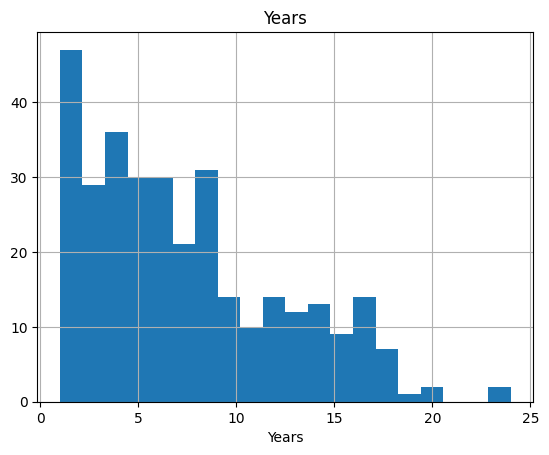

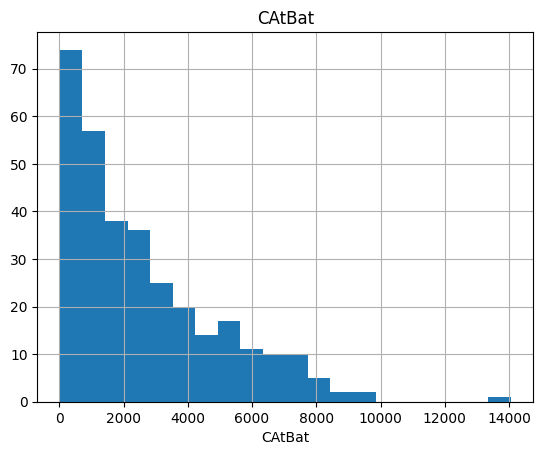

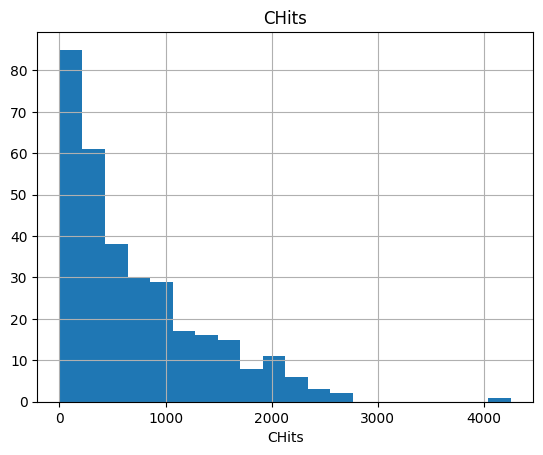

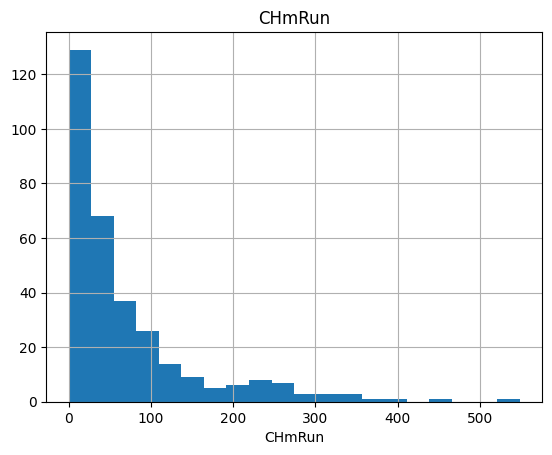

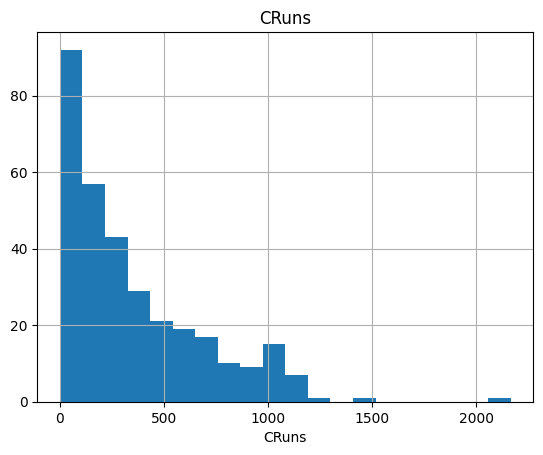

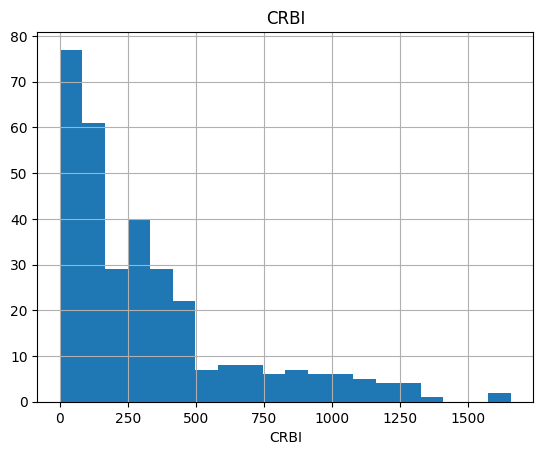

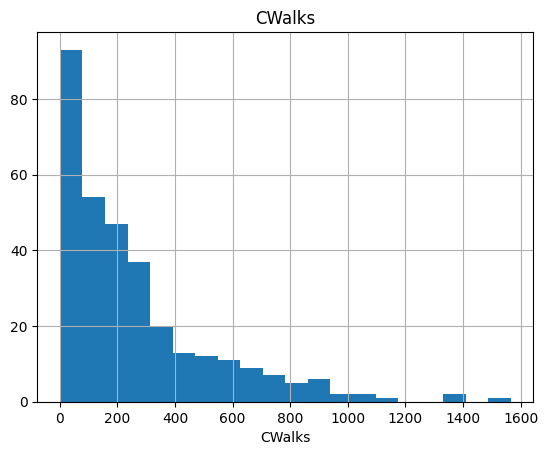

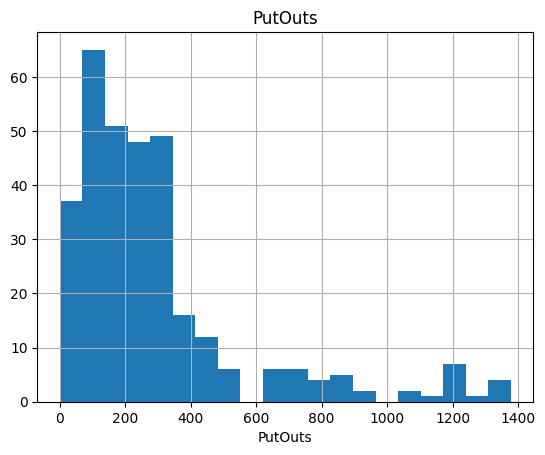

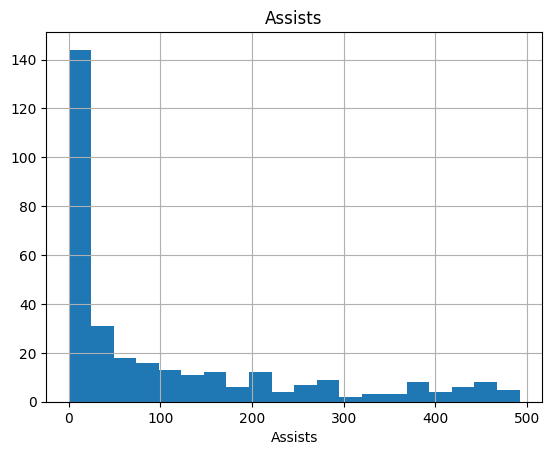

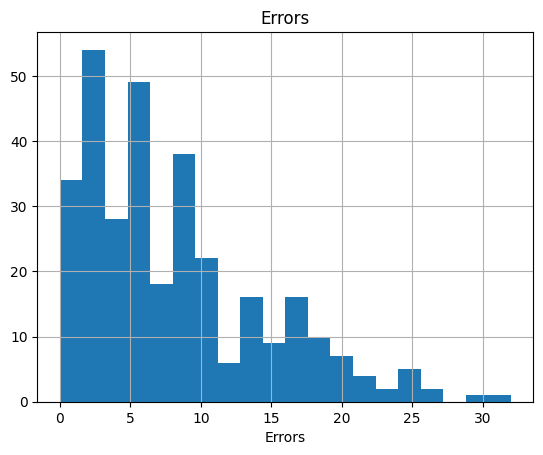

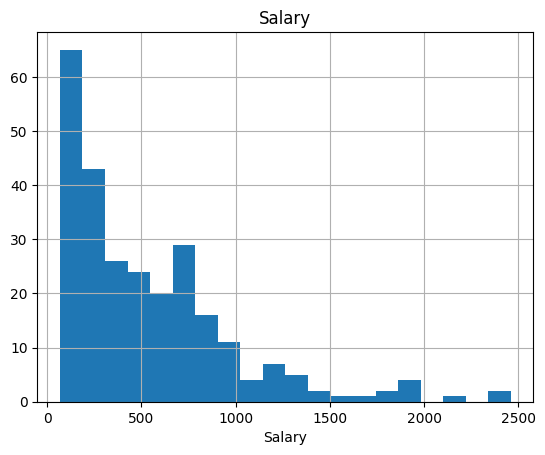

In [8]:
quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
display(df.describe(quantiles).T)

for i in num_cols:
    
    df[i].hist(bins=20)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

# Hedef Değişkene göre Analizler

In [9]:
def target_summary_with_cat(dataframe, target, categorical_col):

    print(pd.DataFrame({"Salary_Mean": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-")

for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

        Salary_Mean
League             
A           542.000
N           529.118


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
          Salary_Mean
Division             
E             624.271
W             450.877


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
           Salary_Mean
NewLeague             
A              537.113
N              534.554


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-


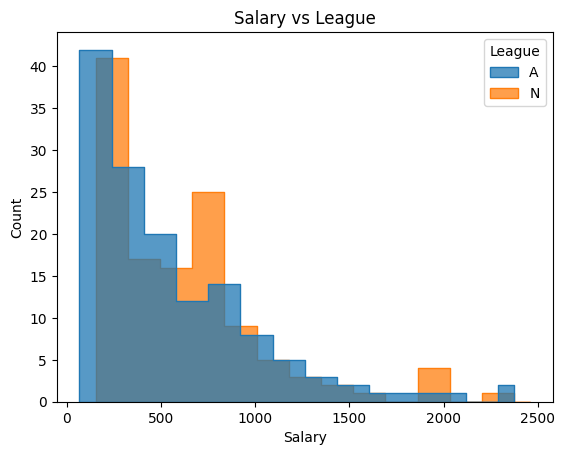

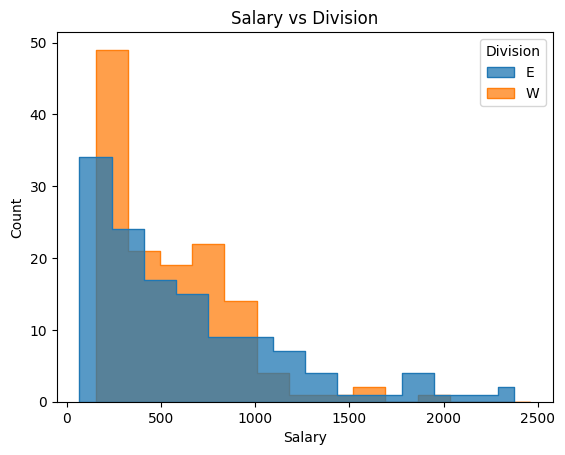

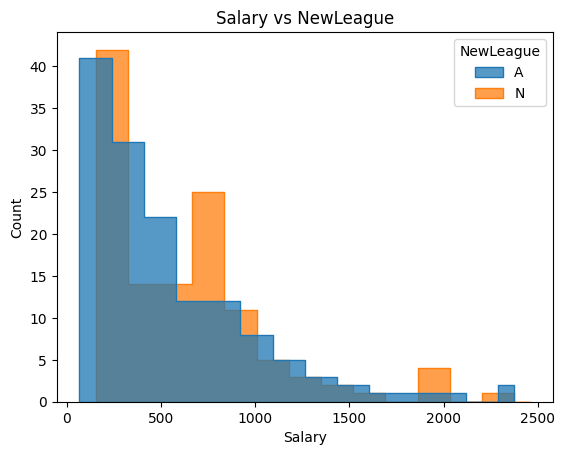

In [10]:
def target_summary_with_cat_graphic(dataframe,target, categorical_col):
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title(f"Salary vs {categorical_col}")
    plt.show()

for col in cat_cols:
    target_summary_with_cat_graphic(df,"Salary",col)

# **KORELASYON**

In [11]:
df[num_cols].corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000,0.968,0.592,0.913,0.821,0.670,0.047,0.236,0.253,0.237,0.267,0.244,0.166,0.318,0.354,0.352,0.395
Hits,0.968,1.000,0.562,0.922,0.811,0.641,0.045,0.228,0.256,0.203,0.262,0.232,0.152,0.311,0.320,0.310,0.439
HmRun,0.592,0.562,1.000,0.651,0.855,0.481,0.116,0.222,0.221,0.493,0.262,0.352,0.233,0.283,-0.106,0.039,0.343
Runs,0.913,0.922,0.651,1.000,0.798,0.732,0.005,0.186,0.205,0.228,0.251,0.206,0.182,0.279,0.221,0.240,0.420
RBI,0.821,0.811,0.855,0.798,1.000,0.616,0.146,0.295,0.308,0.442,0.323,0.393,0.251,0.343,0.107,0.193,0.449
Walks,0.670,0.641,0.481,0.732,0.616,1.000,0.136,0.277,0.281,0.332,0.338,0.309,0.425,0.300,0.150,0.129,0.444
Years,0.047,0.045,0.116,0.005,0.146,0.136,1.000,0.920,0.904,0.727,0.883,0.869,0.839,-0.005,-0.081,-0.162,0.401
CAtBat,0.236,0.228,0.222,0.186,0.295,0.277,0.920,1.000,0.995,0.799,0.983,0.949,0.907,0.062,0.002,-0.067,0.526
CHits,0.253,0.256,0.221,0.205,0.308,0.281,0.904,0.995,1.000,0.783,0.985,0.945,0.891,0.077,-0.003,-0.063,0.549
CHmRun,0.237,0.203,0.493,0.228,0.442,0.332,0.727,0.799,0.783,1.000,0.820,0.929,0.800,0.113,-0.159,-0.138,0.525


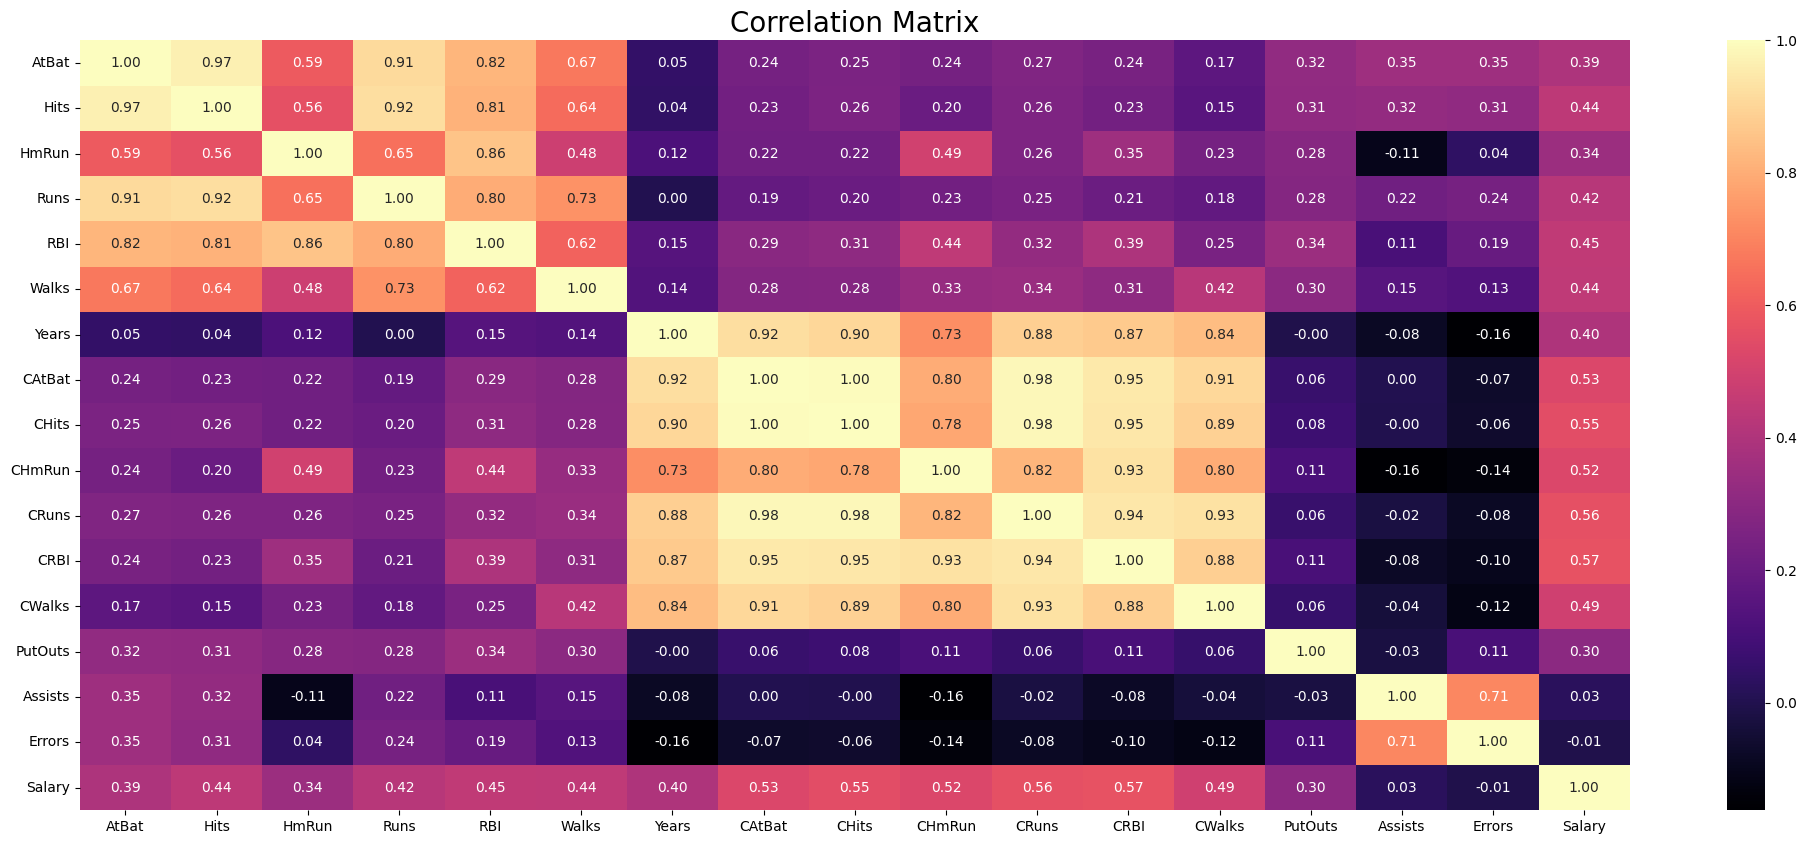

In [12]:
# Korelasyon Matrisi

f, ax = plt.subplots(figsize=[25, 10])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

> # **VERİ ÖN İŞLEME**

**1. AYKIRI DEĞERLER**

In [13]:
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [14]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [15]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [16]:
for col in num_cols:
    print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


**2. EKSİK DEĞERLER**

In [17]:
na_columns = [col for col in df.columns if df[col].isnull().sum()>0]
n_miss = df[na_columns].isnull().sum()
ratio = (df[na_columns].isnull().sum() / df.shape[0] * 100)

missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
missing_df

,n_miss,ratio
Salary,59,18.320


**KNN YÖNTEMİ İLE EKSİK DEĞER DOLDURMA**

%18 büyük bir oran olduğu için direkt silmeyi tercih etmiyorum.

KNN - Tahmine dayalı yöntem ile doldurmayı tercih edeceğim.

In [18]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [19]:
# cat_cols'lar için encoding işlemi yapıyoruz.

dff= pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
dff = dff.replace({True: 1, False: 0})
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66.000,1.000,30,29,14.000,446,33,20,NaN,0,0,0
1,315,81,7,24,38,39,14,3449,835.000,69.000,321,414,375.000,632,43,10,475.000,1,1,1
2,479,130,18,66,72,76,3,1624,457.000,63.000,224,266,263.000,880,82,14,480.000,0,1,0
3,496,141,20,65,78,37,11,5628,1575.000,225.000,828,838,354.000,200,11,3,500.000,1,0,1
4,321,87,10,39,42,30,2,396,101.000,12.000,48,46,33.000,805,40,4,91.500,1,0,1


In [20]:
# Değişkenlerin standartlaştırılması işlemini yapıyoruz.

scaler = MinMaxScaler()
dff= pd.DataFrame(scaler.fit_transform(dff),columns = dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0.413,0.274,0.025,0.231,0.240,0.133,0.000,0.020,0.015,0.002,0.013,0.017,0.009,0.324,0.067,0.625,NaN,0.000,0.000,0.000
1,0.446,0.338,0.175,0.185,0.314,0.371,0.565,0.244,0.207,0.143,0.148,0.250,0.240,0.459,0.087,0.312,0.170,1.000,1.000,1.000
2,0.690,0.544,0.450,0.508,0.595,0.724,0.087,0.114,0.113,0.131,0.103,0.160,0.168,0.639,0.167,0.438,0.172,0.000,1.000,0.000
3,0.715,0.591,0.500,0.500,0.645,0.352,0.435,0.400,0.391,0.468,0.382,0.505,0.226,0.145,0.022,0.094,0.181,1.000,0.000,1.000
4,0.455,0.363,0.250,0.300,0.347,0.286,0.043,0.027,0.024,0.025,0.022,0.028,0.021,0.584,0.081,0.125,0.010,1.000,0.000,1.000


In [21]:
#knn'in uygulanması ve eksik/boş değerlerin doldurulması

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
dff = pd.DataFrame(imputer.fit_transform(dff),columns = dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,0.413,0.274,0.025,0.231,0.240,0.133,0.000,0.020,0.015,0.002,0.013,0.017,0.009,0.324,0.067,0.625,0.020,0.000,0.000,0.000
1,0.446,0.338,0.175,0.185,0.314,0.371,0.565,0.244,0.207,0.143,0.148,0.250,0.240,0.459,0.087,0.312,0.170,1.000,1.000,1.000
2,0.690,0.544,0.450,0.508,0.595,0.724,0.087,0.114,0.113,0.131,0.103,0.160,0.168,0.639,0.167,0.438,0.172,0.000,1.000,0.000
3,0.715,0.591,0.500,0.500,0.645,0.352,0.435,0.400,0.391,0.468,0.382,0.505,0.226,0.145,0.022,0.094,0.181,1.000,0.000,1.000
4,0.455,0.363,0.250,0.300,0.347,0.286,0.043,0.027,0.024,0.025,0.022,0.028,0.021,0.584,0.081,0.125,0.010,1.000,0.000,1.000


In [22]:
dff = pd.DataFrame(scaler.inverse_transform(dff),columns=dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,116.500,0.000,0.000,0.000
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,1.000,1.000,1.000
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,880.000,82.000,14.000,480.000,0.000,1.000,0.000
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,225.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,1.000,0.000,1.000
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,805.000,40.000,4.000,91.500,1.000,0.000,1.000


In [23]:
df["salary_imputed_knn"] = dff["Salary"]

In [24]:
df.loc[df["Salary"].isnull(),["Salary","salary_imputed_knn"]]

,Salary,salary_imputed_knn
0,NaN,116.500
15,NaN,87.600
18,NaN,626.000
22,NaN,189.400
30,NaN,732.000
...,...,...
292,NaN,732.000
298,NaN,280.500
302,NaN,508.667
305,NaN,555.167


**3. ÖZELLİK ÇIKARIMI**

In [25]:
df['NEW_Hits'] = df['Hits'] / df['CHits'] + df['Hits']
df['NEW_PutOuts'] = df['PutOuts'] * df['Years']
df["Hits_Success"] = (df["Hits"] / df["AtBat"]) * 100
df["NEW_CRBI*CATBAT"] = df['CRBI'] * df['CAtBat']
df["NEW_Chits"] = df["CHits"] / df["Years"]
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]
df["NEW_CRuns"] = df["CRuns"] / df["Years"]
df["NEW_Chits"] = df["CHits"] * df["Years"]
df["NEW_RW"] = df["RBI"] * df["Walks"]
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]
df['NEW_Diff_Atbat'] = df['AtBat'] - (df['CAtBat'] / df['Years'])
df['NEW_Diff_Hits'] = df['Hits'] - (df['CHits'] / df['Years'])
df['NEW_Diff_HmRun'] = df['HmRun'] - (df['CHmRun'] / df['Years'])
df['NEW_Diff_Runs'] = df['Runs'] - (df['CRuns'] / df['Years'])
df['NEW_Diff_RBI'] = df['RBI'] - (df['CRBI'] / df['Years'])
df['NEW_Diff_Walks'] = df['Walks'] - (df['CWalks'] / df['Years'])

**4. ENCODİNG**

In [26]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)
df = df.replace({True: 1, False: 0})
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,salary_imputed_knn,NEW_Hits,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66.000,1.000,30,29,14.000,446,33,20,NaN,116.500,67.000,446,22.526,8497,66.000,1.000,30.000,406,0.225,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0
1,315,81,7,24,38,39,14,3449,835.000,69.000,321,414,375.000,632,43,10,475.000,475.000,81.097,8848,25.714,1427886,11690.000,966.000,22.929,1482,0.242,0.020,68.643,21.357,2.071,1.071,8.429,12.214,1,1,1
2,479,130,18,66,72,76,3,1624,457.000,63.000,224,266,263.000,880,82,14,480.000,480.000,130.284,2640,27.140,431984,1371.000,189.000,74.667,5472,0.281,0.039,-62.333,-22.333,-3.000,-8.667,-16.667,-11.667,0,1,0
3,496,141,20,65,78,37,11,5628,1575.000,225.000,828,838,354.000,200,11,3,500.000,500.000,141.090,2200,28.427,4716264,17325.000,2475.000,75.273,2886,0.280,0.040,-15.636,-2.182,-0.455,-10.273,1.818,4.818,1,0,1
4,321,87,10,39,42,30,2,396,101.000,12.000,48,46,33.000,805,40,4,91.500,91.500,87.861,1610,27.103,18216,202.000,24.000,24.000,1260,0.255,0.030,123.000,36.500,4.000,15.000,19.000,13.500,1,0,1


**5. ÖLÇEKLENDİRME**

In [27]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["Salary", "salary_imputed_knn"]]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

Observations: 322
Variables: 37
cat_cols: 3
num_cols: 34
cat_but_car: 0
num_but_cat: 3


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,salary_imputed_knn,NEW_Hits,NEW_PutOuts,Hits_Success,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,NEW_Diff_Atbat,NEW_Diff_Hits,NEW_Diff_HmRun,NEW_Diff_Runs,NEW_Diff_RBI,NEW_Diff_Walks,League_N,Division_W,NewLeague_N
0,-0.574,-0.755,-1.124,-0.805,-0.728,-1.145,-1.310,-1.015,-1.002,-0.803,-0.986,-0.905,-0.924,0.560,-0.541,1.881,NaN,116.500,-0.741,-0.581,-0.956,-0.581,-0.689,-0.567,-0.632,-0.901,-1.412,-1.338,-0.497,-0.437,-0.518,-0.403,-0.532,-0.563,0,0,0
1,-0.430,-0.432,-0.434,-1.036,-0.384,0.012,1.333,0.345,0.182,-0.003,-0.113,0.252,0.430,1.224,-0.468,0.308,475.000,475.000,-0.437,2.293,-0.076,-0.065,0.292,0.100,-0.965,-0.363,-0.754,-0.282,0.097,0.200,-0.106,-0.345,-0.045,0.309,1,1,1
2,0.640,0.625,0.831,0.581,0.918,1.724,-0.904,-0.442,-0.400,-0.074,-0.404,-0.193,0.010,2.109,-0.182,0.937,480.000,480.000,0.624,0.170,0.317,-0.427,-0.579,-0.437,1.470,1.631,0.782,0.913,-1.037,-1.103,-1.115,-0.871,-1.494,-1.397,0,1,0
3,0.751,0.862,1.061,0.542,1.147,-0.081,0.723,1.284,1.321,1.831,1.407,1.527,0.352,-0.317,-0.702,-0.793,500.000,500.000,0.858,0.019,0.672,1.130,0.768,1.143,1.498,0.339,0.721,0.989,-0.632,-0.502,-0.609,-0.957,-0.427,-0.219,1,0,1
4,-0.391,-0.302,-0.089,-0.458,-0.231,-0.405,-1.107,-0.971,-0.948,-0.673,-0.932,-0.854,-0.852,1.841,-0.490,-0.635,91.500,91.500,-0.291,-0.183,0.307,-0.578,-0.678,-0.551,-0.915,-0.474,-0.248,0.373,0.567,0.652,0.278,0.406,0.565,0.401,1,0,1


# BASE MODELS

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, validation_curve

In [29]:
y = df["salary_imputed_knn"]
X = df.drop(["Salary","salary_imputed_knn"], axis=1)

models = [('LR', LinearRegression()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]


In [30]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 255.228 (LR) 
RMSE: 289.4469 (KNN) 
RMSE: 285.3757 (CART) 
RMSE: 245.9252 (RF) 
RMSE: 239.4328 (GBM) 
RMSE: 242.4603 (XGBoost) 
RMSE: 248.0201 (LightGBM) 
RMSE: 242.6377 (CatBoost) 


# LIGHT GBM MODEL

In [31]:
lgbm_model = LGBMRegressor(random_state=17)

lgbm_params = {"learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500],
                "colsample_bytree": [0.7, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)
rmse = np.mean(np.sqrt(-cross_val_score(lgbm_final, X, y, cv=10, scoring="neg_mean_squared_error")))
rmse

Fitting 5 folds for each of 8 candidates, totalling 40 fits


246.95570687459036